<a href="https://colab.research.google.com/github/bhattijasjeet/Datascience_ai/blob/main/Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [367]:
# Import Libraries and Packages


# Data Manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data Modeling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and Helpful Functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, classification_report

# Saving Models
import pickle

**Steps to be Taken out:**


*   Data familiarization and Cleaning
*   Data Exploration (EDA)
*  Feature Engineering
* Models Building and their Features Importance
* Comparing Models' Performance and Results
* Executive Summary: Share Actionable Steps to Stakeholders

- **Step 1: Data Familiarization and Cleaning**

In [368]:
# Data Loading

# df0 = pd.read_csv("/content/drive/MyDrive/attrition/Employee_attrition_combined.csv")
df0 = pd.read_csv("/content/drive/MyDrive/attrition/Employee_attrition.csv")
# df0 = pd.read_csv("/content/drive/MyDrive/attrition/Employee_train.csv")

df0.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [369]:
df0.info()
# 52685 - mid
# 30585 - entry
# 54656 - senior

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [370]:
# Change dtypes of left, promotion_last_5years, Work_accident to boolean

df = df0.copy()
# df[["left", "promotion_last_5years", "Work_accident"]] = df[[
#     "left", "promotion_last_5years", "Work_accident"]].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [371]:
df.duplicated().sum()

np.int64(0)

In [372]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [373]:
df.dropna(inplace=True)

In [374]:
df['Attrition'].value_counts(normalize=True) * 100

,proportion
Attrition,
Stayed,52.805369
Left,47.194631


In [375]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Attrition', 'Job Level','Job Satisfaction','Performance Rating','Company Reputation','Employee Recognition','Remote Work','Leadership Opportunities','Innovation Opportunities','Overtime']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [376]:
df
# 52685 - mid - 1
# 30585 - entry - 0
# 54656 - senior - 2

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,0,0,1,...,1,1,Large,22,0,0,0,3,2,1
1,30585,35,Male,7,Education,4563,Good,0,0,1,...,4,0,Medium,27,0,0,0,2,0,0
2,54656,50,Male,7,Education,5583,Fair,0,0,3,...,2,2,Medium,76,0,0,1,2,1,1
3,33442,58,Male,44,Media,5525,Fair,3,2,0,...,4,0,Medium,96,0,0,0,3,1,0
4,15667,39,Male,24,Education,4604,Good,0,0,0,...,6,1,Large,45,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,2,0,0,...,0,2,Medium,60,0,0,0,3,2,1
14896,47175,30,Female,15,Education,3856,Good,2,0,2,...,0,0,Medium,20,0,0,0,2,2,0
14897,12409,52,Male,5,Education,5654,Good,3,1,0,...,4,1,Small,7,0,0,0,2,0,0
14898,9554,18,Male,4,Education,5276,Fair,0,0,0,...,3,1,Large,5,0,0,0,3,0,1


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  int64 
 8   Performance Rating        14900 non-null  int64 
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  int64 
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

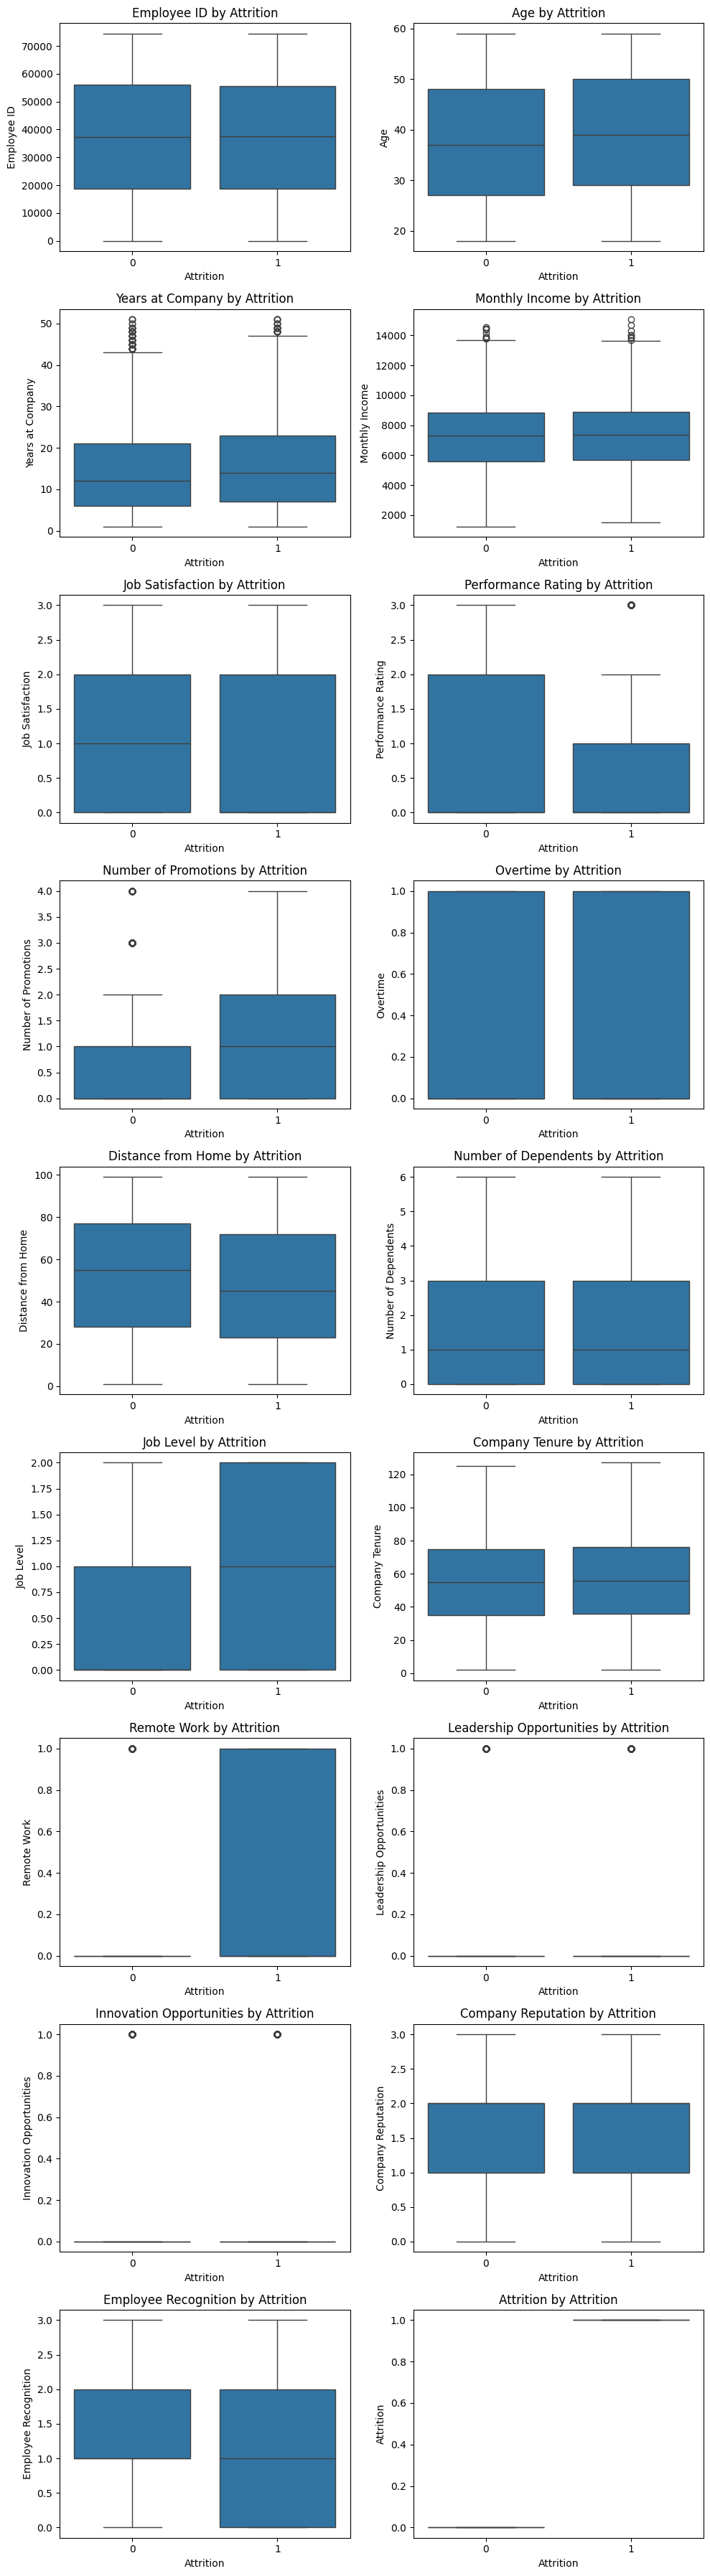

In [378]:
# Check Outliers through Boxplots

import math

# Select Numeric Columns and exclude boolean and Categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Create a boxplot as Subplot for numeric_cols
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numeric_cols):
#     plt.subplot(2, 3, i + 1)
#     sns.boxplot(y=df[col])
#     plt.title(f'Boxplot of {col}')
# plt.tight_layout()
# plt.show()


n = len(numeric_cols)
rows = math.ceil(n / 2)   # 3 plots per row
cols = 2

plt.figure(figsize=(5*cols, 4*rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x="Attrition", y=col, data=df)
    plt.title(f'{col} by Attrition')

plt.tight_layout()
plt.show()

In [379]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,0,0,1,...,1,1,Large,22,0,0,0,3,2,1
1,30585,35,Male,7,Education,4563,Good,0,0,1,...,4,0,Medium,27,0,0,0,2,0,0
2,54656,50,Male,7,Education,5583,Fair,0,0,3,...,2,2,Medium,76,0,0,1,2,1,1
3,33442,58,Male,44,Media,5525,Fair,3,2,0,...,4,0,Medium,96,0,0,0,3,1,0
4,15667,39,Male,24,Education,4604,Good,0,0,0,...,6,1,Large,45,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,2,0,0,...,0,2,Medium,60,0,0,0,3,2,1
14896,47175,30,Female,15,Education,3856,Good,2,0,2,...,0,0,Medium,20,0,0,0,2,2,0
14897,12409,52,Male,5,Education,5654,Good,3,1,0,...,4,1,Small,7,0,0,0,2,0,0
14898,9554,18,Male,4,Education,5276,Fair,0,0,0,...,3,1,Large,5,0,0,0,3,0,1


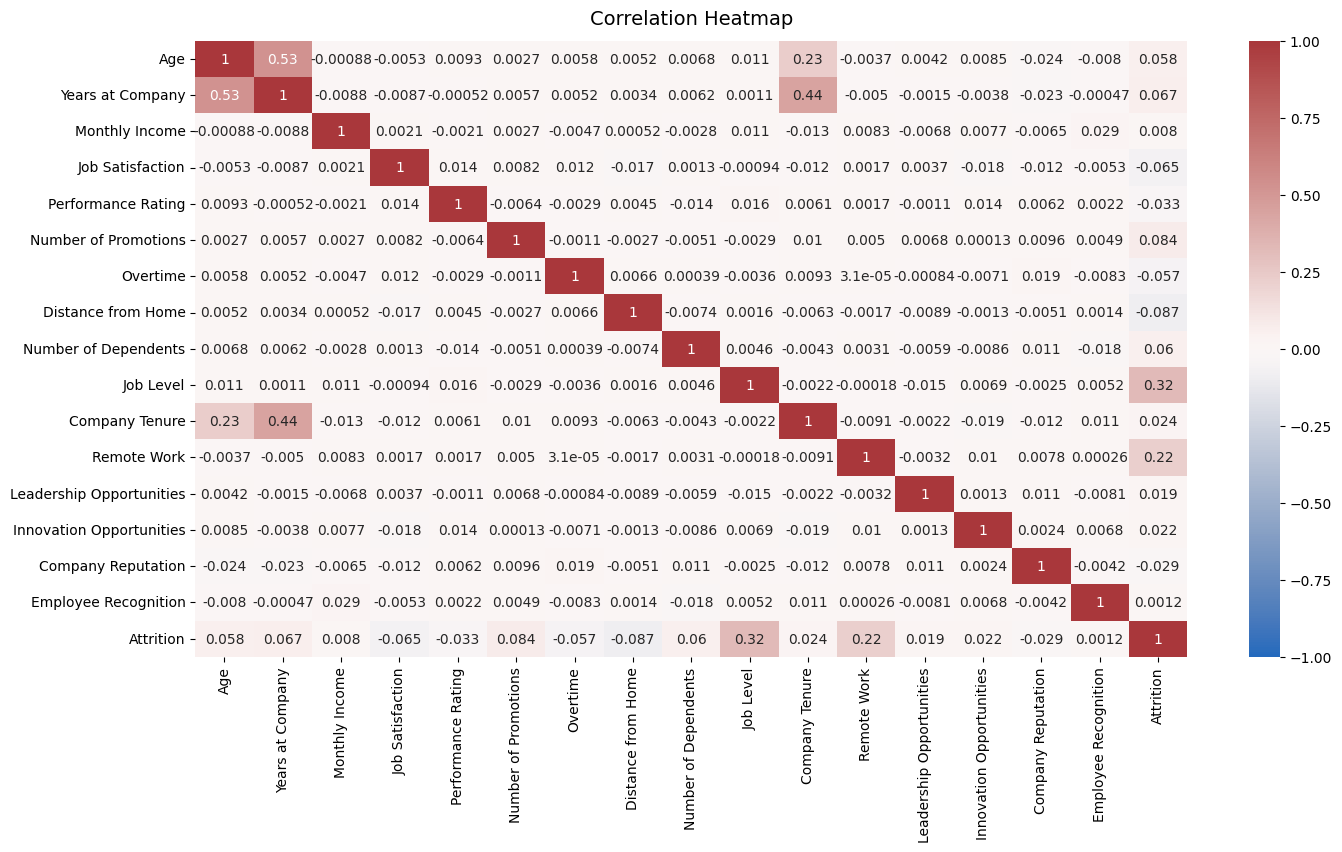

In [380]:
# Plot a correlation heatmap


# Prepare data for heatmap
df_heat = df.copy()
df_heat = df_heat.drop(columns=['Employee ID'])
# Drop all object (string/categorical) columns
df_heat = df_heat.drop(columns=df_heat.select_dtypes(include=['object']).columns)




# Plot heatmap
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_heat.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

In [381]:
# Spearman Correlation Analysis Between DV and IVS
from scipy import stats

# Define DV and IVS
dv_spearman = df['Attrition']
iv_spearman = df.copy()
iv_spearman = iv_spearman.drop(columns=['Employee ID','Attrition'])
iv_spearman = iv_spearman.drop(columns=iv_spearman.select_dtypes(include=['object']).columns)


# # Compute Spearman correlations for all IVs × all DV
corr_table = []
for col in iv_spearman.columns:
    rho, pval = stats.spearmanr(iv_spearman[col], dv_spearman)
    corr_table.append({
        'IV': col,
        'DV': 'left',
        'Spearman_rho': rho,
        'p_value': pval
    })

# Convert to DataFrame
corr_df = pd.DataFrame(corr_table)

# Display correlation table
corr_df=corr_df.sort_values(by="Spearman_rho", ascending=False)
corr_df

,IV,DV,Spearman_rho,p_value
9,Job Level,left,0.318207,0.000000e+00
11,Remote Work,left,0.224174,4.590871e-169
1,Years at Company,left,0.073658,2.204837e-19
5,Number of Promotions,left,0.062950,1.459650e-14
0,Age,left,0.058628,7.946831e-13
8,Number of Dependents,left,0.049135,1.963807e-09
10,Company Tenure,left,0.022244,6.619739e-03
13,Innovation Opportunities,left,0.021626,8.292313e-03
12,Leadership Opportunities,left,0.019171,1.927587e-02
2,Monthly Income,left,0.008477,3.008236e-01


**Interpretation of Spearman Correlation Results:**

Here is an interpretation of the Spearman correlation results for each independent variable with 'Attrition':

*   **Job Level:** $\rho = 0.318$ (p < 0.001). There is a moderately strong positive correlation. This suggests that as employees move up in job level, they are more likely to leave the company. This could indicate challenges or opportunities associated with higher-level positions that contribute to attrition.

*   **Remote Work:** $\rho = 0.224$ (p < 0.001). There is a moderate positive correlation. Employees who work remotely are more likely to attrite. This finding warrants further investigation to understand the reasons behind this association (e.g., lack of connection, better external opportunities for remote workers).

*   **Years at Company:** $\rho = 0.074$ (p < 0.001). A weak positive correlation. While statistically significant, the practical implication is that the number of years at the company has a minor positive association with attrition.

*   **Number of Promotions:** $\rho = 0.063$ (p < 0.001). A weak positive correlation. Employees with more promotions have a slightly higher tendency to leave. This could be counterintuitive and might suggest that promotions are not always sufficient to retain employees, or that those who are promoted are also more marketable externally.

*   **Age:** $\rho = 0.059$ (p < 0.001). A weak positive correlation. Older employees are slightly more likely to attrite. This could be due to various factors, including retirement or seeking different opportunities later in their careers.

*   **Number of Dependents:** $\rho = 0.049$ (p < 0.001). A weak positive correlation. Employees with more dependents show a slightly higher likelihood of attrition.

*   **Company Tenure:** $\rho = 0.022$ (p = 0.007). A very weak positive correlation. Although statistically significant, the relationship between company tenure and attrition is very weak.

*   **Innovation Opportunities:** $\rho = 0.022$ (p = 0.008). A very weak positive correlation.

*   **Leadership Opportunities:** $\rho = 0.019$ (p = 0.019). A very weak positive correlation.

*   **Monthly Income:** $\rho = 0.008$ (p = 0.301). A negligible positive correlation. Monthly income, based on this analysis, does not appear to have a statistically significant linear or monotonic relationship with attrition.

*   **Employee Recognition:** $\rho = 0.001$ (p = 0.946). A negligible positive correlation. Similar to monthly income, employee recognition does not show a significant association with attrition in this analysis.

*   **Company Reputation:** $\rho = -0.029$ (p < 0.001). A weak negative correlation. A better company reputation is slightly associated with a lower likelihood of attrition.

*   **Performance Rating:** $\rho = -0.033$ (p < 0.001). A weak negative correlation. Higher performance ratings are slightly associated with a lower likelihood of attrition.

*   **Overtime:** $\rho = -0.057$ (p < 0.001). A weak negative correlation. Employees working more overtime are slightly less likely to leave. This could be related to job involvement or satisfaction, but the correlation is weak.

*   **Job Satisfaction:** $\rho = -0.068$ (p < 0.001). A weak negative correlation. Higher job satisfaction is associated with a slightly lower likelihood of attrition. While expected, the strength of this correlation is weaker than some other factors.

*   **Distance from Home:** $\rho = -0.087$ (p < 0.001). A weak negative correlation. Employees who live further from home are slightly less likely to leave. This is an interesting finding that might warrant further exploration.

**Summary:**

The Spearman correlation analysis reveals several statistically significant relationships between various factors and employee attrition. 'Job Level' and 'Remote Work' show the strongest positive associations with attrition, while 'Distance from Home', 'Job Satisfaction', and 'Overtime' have the strongest negative associations. However, it's important to note that most of the correlations are weak to moderate, suggesting that attrition is likely a complex phenomenon influenced by a combination of these factors rather than being solely driven by a few dominant ones. The very low p-values for most features indicate that these observed relationships are statistically reliable.

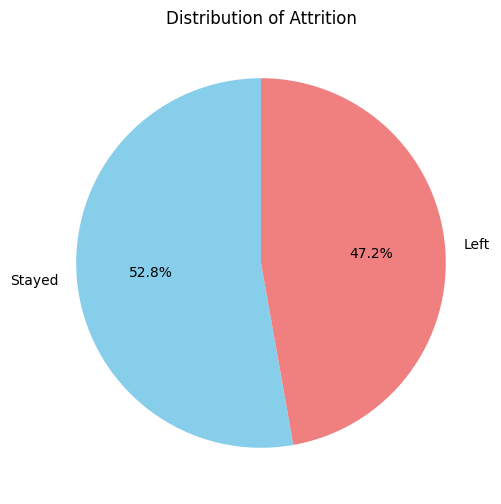

In [382]:
# Create a pie chart for Attrition distribution
plt.figure(figsize=(6, 6))
df0['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Attrition')
plt.ylabel('') # Remove the default 'Attrition' label on y-axis for a cleaner look
plt.show()

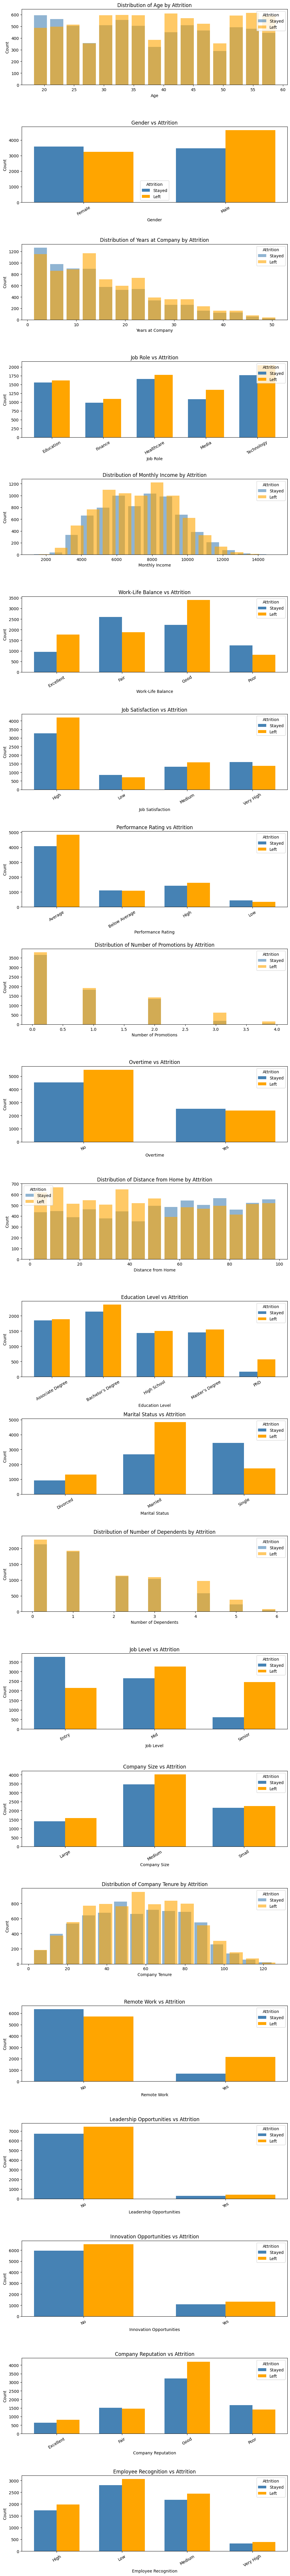

In [383]:
# Univariate Analysis for Numeric and Categorical Variables

target = "Attrition"
# cols = [
#     "Job Level",
#     "Remote Work",
#     "Years at Company",
#     "Number of Promotions",
#     "Age",
#     "Gender",
#     # "Number of Dependents",
#     # "Company Tenure",
#     "Innovation Opportunities",
#     "Leadership Opportunities",
#     # "Monthly Income",
#     "Employee Recognition",
#     "Company Reputation",
#     "Performance Rating",
#     "Overtime",
#     "Job Satisfaction",
#     # "Distance from Home"
# ]

df_eda=df0
df_eda = df_eda.drop(columns=['Employee ID','Attrition'])


cols=df_eda.columns

n_rows = len(cols)
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 4*n_rows))

for ax, col in zip(axes, cols):
    if pd.api.types.is_numeric_dtype(df0[col]):
        # Numeric: histogram split by target
        # for label, color in zip([0,1], ["steelblue", "orange"]):
        #     subset = df[df0[target]==label][col]
        #     ax.hist(subset, bins=20, alpha=0.6,
        #             label="Stayed" if label==0 else "Left",
        #             color=color, rwidth=0.8)
        # ax.set_xlabel(col)
        # ax.set_ylabel("Count")
        # ax.set_title(f"Distribution of {col} by {target}")
        # ax.legend(title="Attrition")
          for label, color in zip([0, 1], ["steelblue", "orange"]):
            subset = df[df[target] == label][col]
            ax.hist(
            subset, bins=15, alpha=0.6,
            label="Stayed" if label == 0 else "Left",
            color=color, rwidth=0.8
            )
          ax.set_xlabel(col)
          ax.set_ylabel("Count")
          ax.set_title(f"Distribution of {col} by {target}")
          ax.legend(title="Attrition")
    else:
        # Categorical: bar chart
        counts = pd.crosstab(df0[col], df0[target])
        categories = counts.index.astype(str)

        x = np.arange(len(categories))
        width = 0.35

        # use .iloc instead of direct [0]/[1]
        ax.bar(x - width/2, counts.iloc[:,0], width, label="Stayed", color="steelblue")
        ax.bar(x + width/2, counts.iloc[:,1], width, label="Left", color="orange")

        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=30)
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.set_title(f"{col} vs {target}")
        ax.legend(title="Attrition")

plt.tight_layout()
plt.show()

In [384]:
# print("Years at Company",df0['Years at Company'].unique())
# print("Age",df0['Age'].unique())


# cols=df0.columns

# for ax, col in zip(axes, cols):
#     if pd.api.types.is_numeric_dtype(df0[col]):
#        print(col,df0[col].unique(),"\n")


In [385]:
df0

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [386]:
df_model = df0.copy()

# df_model['Job Level'] = df_model['average_montly_hours']
# df_model['overworked'] = (df_model['overworked'] > 160).astype(int)


df_model.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [387]:

df_model = df_model.drop(columns=['Employee ID'])

In [388]:
# features = [
#     "Age",
#     "Number of Dependents",
#     "Distance from Home",
#     "Years at Company",
#     "Job Satisfaction",
#     "Leadership Opportunities",
#     "Innovation Opportunities",
#     "Performance Rating",
#     "Number of Promotions",
#     "Monthly Income",
#     "Employee Recognition",
#     "Company Reputation",
#     "Overtime",
#     "Remote Work"
# ]

In [389]:
# 1. Split Features & Target

y = df_model['Attrition']
X = df_model.drop(columns='Attrition')

print(y.head())
print ('--' * 10)
X.head()

0    Stayed
1      Left
2    Stayed
3      Left
4    Stayed
Name: Attrition, dtype: object
--------------------


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,Married,1,Mid,Large,22,No,No,No,Poor,Medium
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,Single,4,Entry,Medium,27,No,No,No,Good,High
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low
3,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,...,Single,4,Entry,Medium,96,No,No,No,Poor,Low
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,Married,6,Mid,Large,45,Yes,No,No,Good,High


In [390]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [391]:
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()

In [392]:
# 3. Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Categorical Features: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


In [393]:
# 4. Preprocessing

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# numeric_transformer = Pipeline(steps=[
#     ("scaler", StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_features),
#         ("cat", categorical_transformer, categorical_features)
#     ]
# )

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [394]:
# Random Forest Classifier

pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

In [395]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

,0


In [396]:
%%time

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

CPU times: user 3.03 s, sys: 12.5 ms, total: 3.05 s
Wall time: 3.14 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_freque...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Job Role',
                                                   'Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Overtime',
                                                   'Education Level',
                                                   'Marital Status',
                                                   'Job Level', 'Company Size',
                                                   'Remote Work',
                                                   'Leadership Opportunities',
                                                   'Innovation Opportunities',
                                                   'Company Reputation',
                                                   'Employee Recognition'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [397]:
# Make predictions on the training and test data
y_training_pred_rf = pipeline_rf.predict(X_train)
y_test_pred_rf = pipeline_rf.predict(X_test)

In [398]:
# Calculate accuracy score on both training and test sets
train_accuracy_rf = accuracy_score(y_train, y_training_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate the gap between training and test accuracy
accuracy_gap_rf = (train_accuracy_rf - test_accuracy_rf) * 100

print(f"Accuracy Score on Training Data: {train_accuracy_rf:.4f}")
print(f"Accuracy Score on Test Data: {test_accuracy_rf:.4f}")
print(f"Gap between Training and Test Accuracy: {accuracy_gap_rf:.2f}%")

Accuracy Score on Training Data: 1.0000
Accuracy Score on Test Data: 0.7409
Gap between Training and Test Accuracy: 25.91%


In [399]:
# Calculate Classification Report and Confusion Matrix
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rf))

print ("--" * 30)
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred_rf))


Classification Report on Test Data:
              precision    recall  f1-score   support

        Left       0.72      0.73      0.73      1755
      Stayed       0.76      0.75      0.75      1970

    accuracy                           0.74      3725
   macro avg       0.74      0.74      0.74      3725
weighted avg       0.74      0.74      0.74      3725

------------------------------------------------------------

Confusion Matrix on Test Data:
[[1287  468]
 [ 497 1473]]


/tmp/ipython-input-389174359.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df0[target_col] = df0[target_col].replace({'Yes': 1, 'No': 0, 'Left': 1, 'Stayed': 0}).astype(int)



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1574
           1       0.73      0.69      0.71      1406

    accuracy                           0.74      2980
   macro avg       0.73      0.73      0.73      2980
weighted avg       0.74      0.74      0.73      2980

------------------------------------------------------------

Confusion Matrix on Test Data:
[[1214  360]
 [ 429  977]]

AUC Score (Random Forest): 0.8224


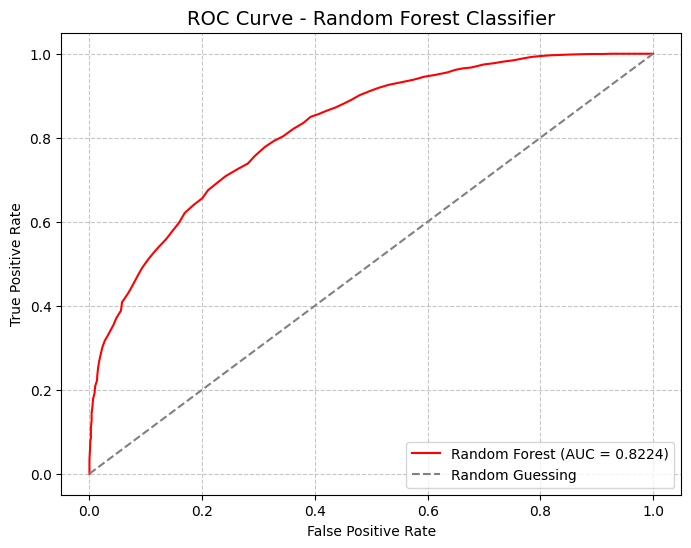

In [400]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)


target_col = 'Attrition'  # or your actual target column name

# ✅ Map target labels to binary (1 = Left / Yes, 0 = Stayed / No)
df0[target_col] = df0[target_col].replace({'Yes': 1, 'No': 0, 'Left': 1, 'Stayed': 0}).astype(int)

# ✅ Split into features and target
X = df0.drop(columns=[target_col])
y = df0[target_col]

# ✅ Encode categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Predictions
y_test_pred_rf = rf_model.predict(X_test)

# ✅ Classification Report & Confusion Matrix
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rf))

print("--" * 30)
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred_rf))

# ✅ Compute AUC & ROC Curve
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_test_proba_rf)
print(f"\nAUC Score (Random Forest): {auc_score:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_rf)

# ✅ Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'Random Forest (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.title('ROC Curve - Random Forest Classifier', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [401]:
# Baseline Accuracy Calculation numpy array format and compare to model test accuracy
from sklearn.preprocessing import LabelEncoder

# Encode y_test_pred_rf into integers
le = LabelEncoder()
y_test_pred_rf_encoded = le.fit_transform(y_test_pred_rf)

# Baseline = majority class accuracy
baseline_accuracy_rf = np.mean(y_test_pred_rf_encoded == np.bincount(y_test_pred_rf_encoded).argmax())
print(f"Baseline (Majority Class) Accuracy RF: {baseline_accuracy_rf:.4f}")

# Compare with your model accuracy
model_accuracy_rf = (test_accuracy_rf - baseline_accuracy_rf) * 100
print(f"Improvement over baseline: {model_accuracy_rf:.2f}%")

Baseline (Majority Class) Accuracy RF: 0.5513
Improvement over baseline: 18.96%


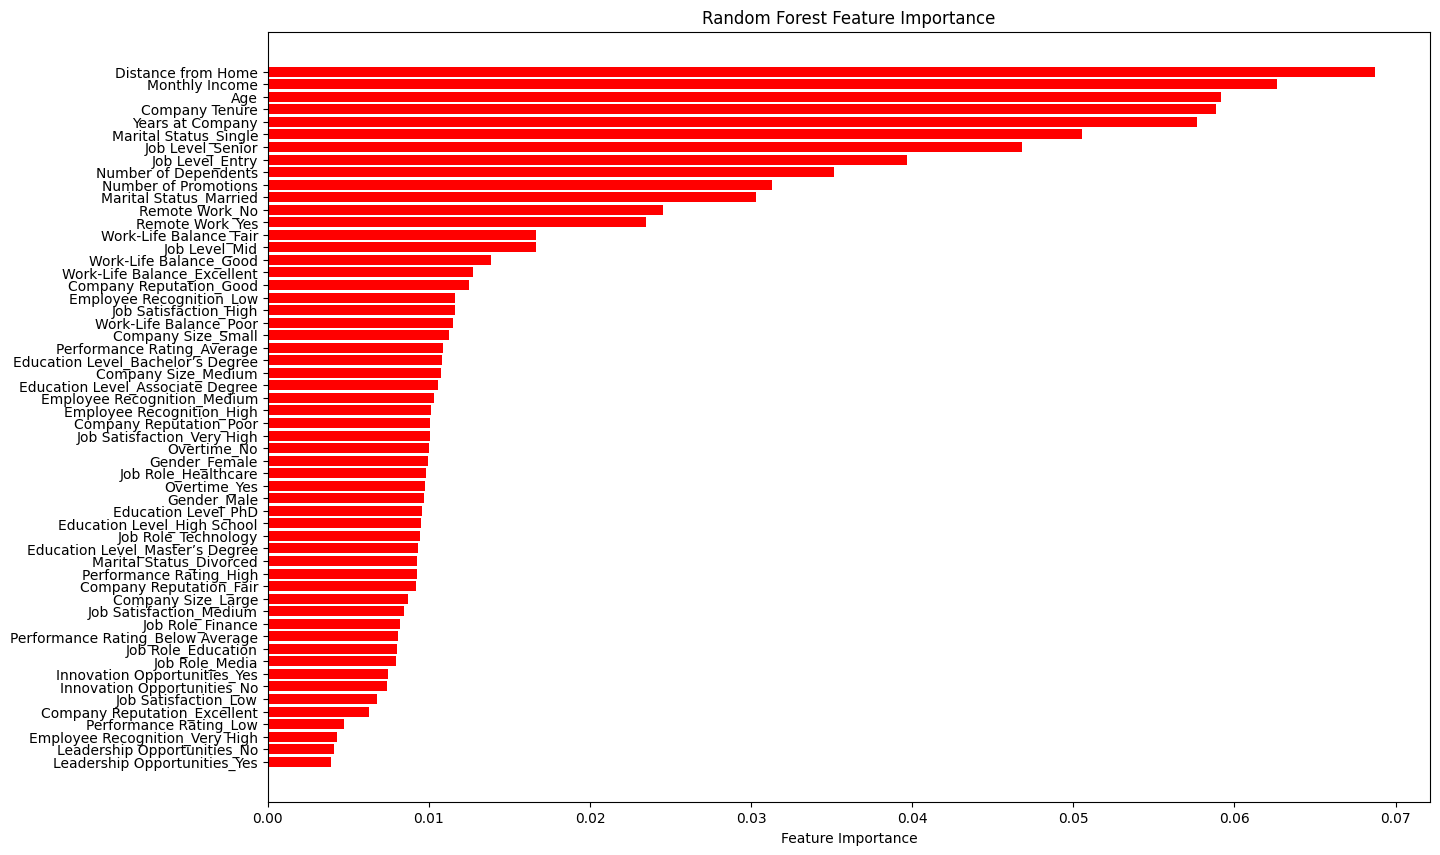

In [402]:
# Feature Importance Visualization of Random Forest

# Get trained RF model
rf_model = pipeline_rf.named_steps['model']

# Get feature names after preprocessing
ohe = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Feature importance
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.6

# Plot
plt.figure(figsize=(15, 10))
plt.barh(pos, feature_importances[sorted_idx], align='center',color='red')
plt.yticks(pos, [all_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title("Random Forest Feature Importance")
plt.show()

In [403]:
y_test


,Attrition
5412,1
13609,1
5422,0
771,0
14792,1
...,...
5172,1
6924,1
10164,0
2679,1


## Xgboost Classifier

In [404]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import pandas as pd

# Ensure target is numeric
df0['Attrition'] = df0['Attrition'].replace({'Yes': 1, 'No': 0, 'Left': 1, 'Stayed': 0}).astype(int)

# Split features and target
X = df0.drop(columns=['Attrition'])
y = df0['Attrition']

# Automatically detect categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)



Categorical Columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
Numeric Columns: ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']


In [405]:
# XGBoost pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])



In [406]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [407]:
# Fit pipeline
pipeline_xgb.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Job Role',
                                                   'Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Overtime',
                                                   'Education Level',
                                                   'Marital Status',
                                                   'Job Level', 'Company Size',
                                                   'Remote Work',
                                                   'Leadership Opportunities',
                                                   'Innovation Opportunities',
                                                   'Company Reputation',
                                                   'Employee...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [408]:
# Evaluate
y_train_pred = pipeline_xgb.predict(X_train)
y_test_pred = pipeline_xgb.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1574
           1       0.73      0.72      0.72      1406

    accuracy                           0.74      2980
   macro avg       0.74      0.74      0.74      2980
weighted avg       0.74      0.74      0.74      2980



In [409]:
from sklearn.metrics import accuracy_score

# Predict on both training and test sets
y_train_pred = pipeline_xgb.predict(X_train)
y_test_pred  = pipeline_xgb.predict(X_test)

# Compute accuracies
train_accuracy_xgb = accuracy_score(y_train, y_train_pred)
test_accuracy_xgb  = accuracy_score(y_test, y_test_pred)

# Compute overfitting gap
accuracy_gap_xgb = (train_accuracy_xgb - test_accuracy_xgb) * 100

# Display results
print(f"Training Accuracy (XGBoost): {train_accuracy_xgb:.4f}")
print(f"Testing Accuracy  (XGBoost): {test_accuracy_xgb:.4f}")
print(f"Overfitting Gap   : {accuracy_gap_xgb:.2f}%")



Training Accuracy (XGBoost): 0.9518
Testing Accuracy  (XGBoost): 0.7389
Overfitting Gap   : 21.29%


In [425]:
# # Baseline Accuracy Calculation numpy array format and compare to model test accuracy
baseline_accuracy_xgb = np.mean(y_test_pred == np.bincount(y_test_pred).argmax())
print(f"Baseline (Majority Class) Accuracy XGB: {baseline_accuracy_xgb:.4f}")

model_accuracy_xgb = (test_accuracy_xgb - baseline_accuracy_xgb) * 100
print(f"Model Accuracy over Baseline XGB: {model_accuracy_xgb:.2f}%")

Baseline (Majority Class) Accuracy XGB: 0.5336
Model Accuracy over Baseline XGB: 20.54%


In [410]:
# AUC
y_proba = pipeline_xgb.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.8251


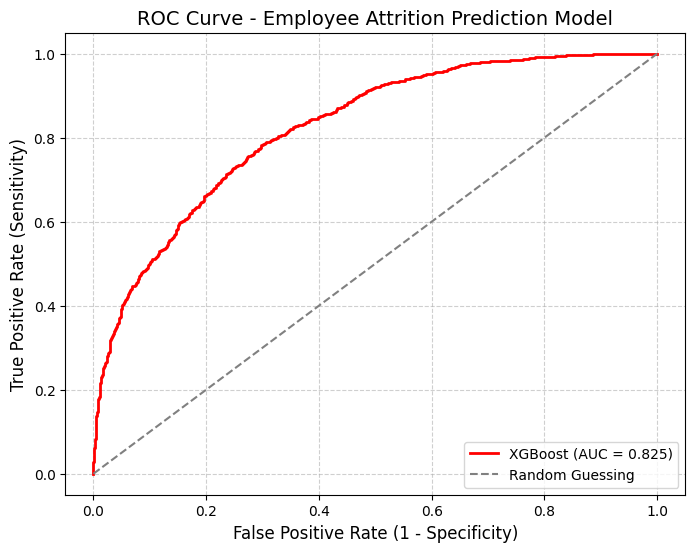

AUC Score: 0.8251


In [411]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class (e.g., employees likely to leave)
y_test_proba = pipeline_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', linewidth=2, label=f'XGBoost (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# Chart formatting
plt.title('ROC Curve - Employee Attrition Prediction Model', fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"AUC Score: {auc_score:.4f}")


**Key Findings from AUC using XGBoost Model:**

The AUC (Area Under the ROC Curve) is a measure of a classification model's ability to distinguish between classes. An AUC of 0.5 suggests the model is no better than random guessing, while an AUC of 1.0 indicates a perfect model.

The XGBoost model achieved an AUC score of **0.8251**.

Here are some key findings based on this AUC score:

*   **Good Discriminative Power:** An AUC of 0.8251 indicates that the XGBoost model has good discriminative power. It is reasonably effective at distinguishing between employees who are likely to leave (attrite) and those who are likely to stay.
*   **Performance Above Random Guessing:** The AUC is significantly higher than 0.5, confirming that the model is performing much better than simply guessing whether an employee will leave or stay.
*   **Moderate to Good Model:** An AUC in the range of 0.80 to 0.90 is generally considered to represent a good to excellent model. The XGBoost model falls within this range, suggesting it is a valuable tool for predicting employee attrition in this dataset.
*   **Useful for Ranking Predictions:** The AUC score is particularly useful when the goal is to rank predictions by their likelihood of belonging to the positive class (attrition). A higher AUC means the model is better at assigning a higher probability of attrition to those employees who actually leave. This can be helpful for targeted interventions to retain at-risk employees.

In summary, the AUC of 0.8251 for the XGBoost model demonstrates that it is a capable model for predicting employee attrition and can be a useful tool for identifying employees at higher risk of leaving the company.

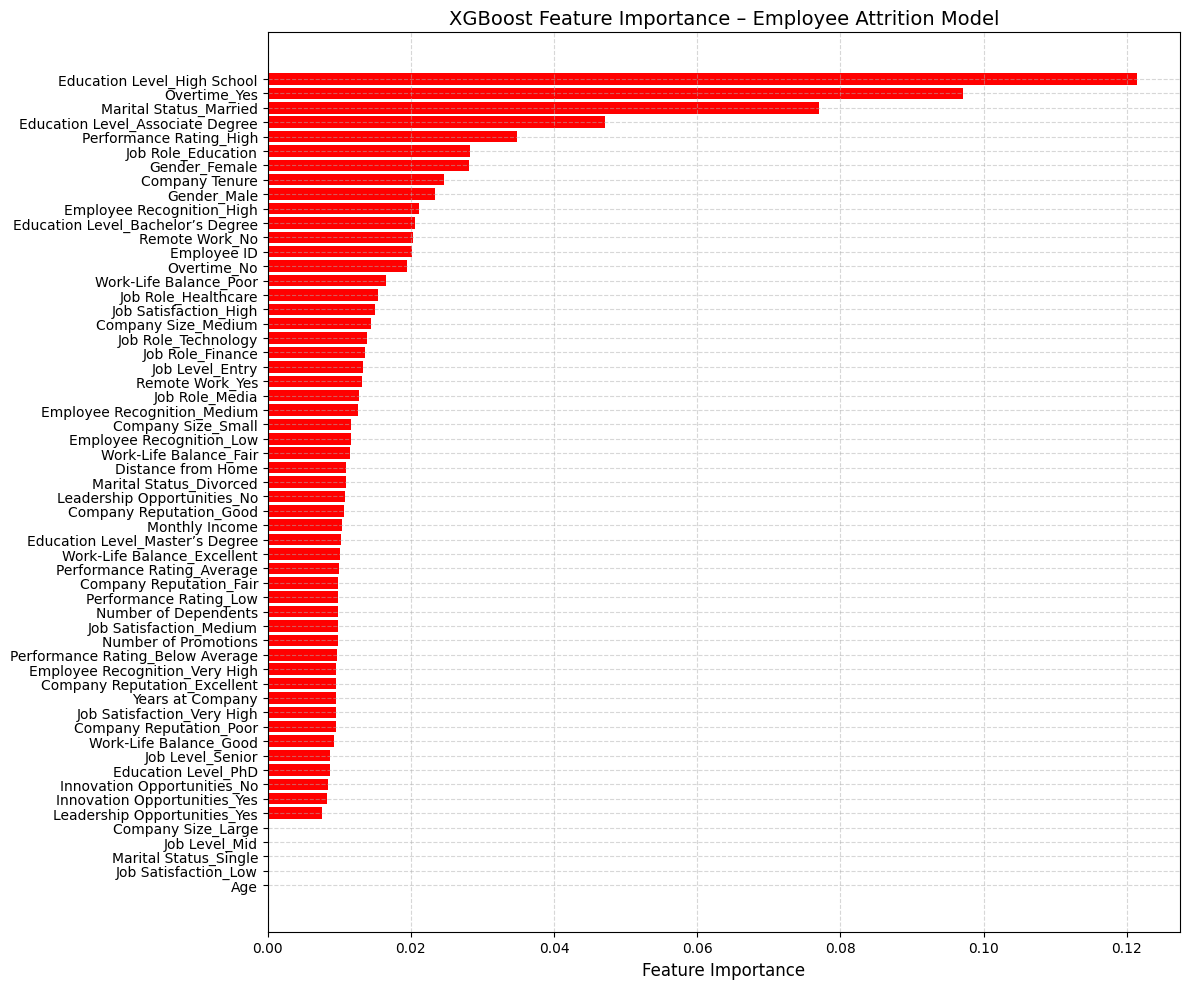

In [412]:
import numpy as np
import matplotlib.pyplot as plt

# Get trained XGBoost model from pipeline
xgb_model = pipeline_xgb.named_steps['classifier']   # <-- use 'classifier' not 'model'

# Get categorical feature names after OneHotEncoding
ohe = pipeline_xgb.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_cols)

# Combine numeric + categorical feature names
all_features = np.concatenate([numeric_cols, cat_features])

# Get feature importances from trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.6

# Plot Feature Importances
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importances[sorted_idx], align='center', color='red')
plt.yticks(pos, [all_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('XGBoost Feature Importance – Employee Attrition Model', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [426]:

# Comparison Table

comparison_table = pd.DataFrame({
    ("Model", ""): ["Random Forest", "XGBoost"],
    ("Train", "Accuracy"): [train_accuracy_rf, train_accuracy_xgb],
    ("Test", "Accuracy"): [test_accuracy_rf, test_accuracy_xgb],
    ("Accuracy", " Gap %"): [accuracy_gap_rf, accuracy_gap_xgb],
    ("Model Accuracy", "over Baseline %"): [model_accuracy_rf, model_accuracy_xgb]
})

comparison_table.columns = pd.MultiIndex.from_tuples(comparison_table.columns)
comparison_table

,Model,Train,Test,Accuracy,Model Accuracy
,,Accuracy,Accuracy,Gap %,over Baseline %
0,Random Forest,1.000000,0.740940,25.906040,18.959732
1,XGBoost,0.951846,0.738926,21.291946,20.536913


## Key Findings and Recommendations

Based on the exploratory data analysis (EDA) and the predictive modeling performed, here are some key findings and actionable recommendations to address employee attrition:

**Key Findings:**

*   **Significant Attrition Rate:** The dataset shows a substantial number of employees leaving the company (around 47%), indicating that attrition is a significant issue that needs attention.
*   **Key Drivers of Attrition:** The analysis, particularly the Spearman correlation and XGBoost feature importance, highlights several factors strongly associated with attrition:
    *   **Job Level:** Employees in higher job levels are more likely to leave. This could be due to increased stress, better external opportunities, or a lack of growth within the current company once a certain level is reached.
    *   **Remote Work:** Remote employees show a higher propensity to attrite. This might be linked to feelings of isolation, reduced connection to the company culture, or increased exposure to other remote job opportunities.
    *   **Monthly Income:** While the correlation was weak, XGBoost identified Monthly Income as a top feature, suggesting income level, or potentially satisfaction with income, plays a role in attrition.
    *   **Age and Years at Company/Tenure:** While correlations were weak to moderate, these were identified as important features by the model. This could indicate different reasons for attrition at various career stages (e.g., younger employees seeking rapid growth, older employees nearing retirement or seeking different work-life balance).
    *   **Distance from Home and Job Satisfaction:** These factors showed the strongest negative correlations, indicating that employees who live further away and those with lower job satisfaction are more likely to leave.
    *   **Performance Rating and Company Reputation:** Employees with lower performance ratings and those working in companies with a poorer reputation are slightly more likely to attrite.
*   **Model Performance:** Both Random Forest and XGBoost models performed significantly better than the baseline, with AUC scores above 0.80. The XGBoost model shows better generalization with a smaller gap between training and test accuracy, making it a more reliable model for prediction.

**Recommendations:**

Based on these findings, here are some recommendations to potentially reduce employee attrition:

1.  **Investigate Attrition at Higher Job Levels:** Conduct deeper analysis or exit interviews for employees leaving from higher job levels to understand the specific reasons and challenges they face. Consider leadership development programs, mentorship, or new challenges for senior employees to keep them engaged.
2.  **Address Remote Work Challenges:** Implement strategies to enhance engagement and connection for remote employees. This could include virtual team-building activities, clear communication channels, ensuring access to necessary resources, and providing opportunities for in-person interaction periodically.
3.  **Review Compensation and Recognition:** While correlation was weak for Monthly Income and Employee Recognition, the model's importance placed on income suggests compensation competitiveness is still relevant. Review salary bands, bonus structures, and recognition programs to ensure they are competitive and perceived as fair.
4.  **Focus on Job Satisfaction and Work-Life Balance:** Actively measure and work to improve job satisfaction and work-life balance. This could involve manager training, flexible work arrangements (beyond just remote work), workload management, and promoting a healthy work environment.
5.  **Support Employees Based on Tenure:** Recognize that employees at different tenure stages may have different needs. Consider tailored retention strategies, career pathing discussions, and development opportunities based on an employee's time with the company.
6.  **Improve Company Culture and Reputation:** Address factors contributing to a poorer company reputation if identified as a significant driver. Foster a positive and supportive work environment.
7.  **Utilize the Predictive Model:** Implement the trained XGBoost model to identify employees at high risk of attrition. Use these insights to proactively engage with at-risk employees through their managers or HR to understand their concerns and explore retention options.

By focusing on these areas and using the insights from the predictive model, the company can develop targeted strategies to improve employee retention and reduce the costs associated with high attrition.